In [1]:
import pandas as pd

# Load the dataset
df = pd.read_excel('heart_disease_health_indicators_BRFSS2015.xlsx')

# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


First few rows of the dataset:
   HeartDiseaseorAttack  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                     0       1         1          1   40       1       0   
1                     0       0         0          0   25       1       0   
2                     0       1         1          1   28       0       0   
3                     0       1         0          1   27       0       0   
4                     0       1         1          1   24       0       0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0         0             0       0  ...              1            0        5   
1         0             1       0  ...              0            1        3   
2         0             0       1  ...              1            1        5   
3         0             1       1  ...              1            0        2   
4         0             1       1  ...              1            0        2   

   MentHlth  PhysHlth  DiffWalk

In [2]:
# Displaying basic statistics of numerical features
numerical_stats = df.describe()
print(numerical_stats)

       HeartDiseaseorAttack         HighBP       HighChol      CholCheck  \
count         253680.000000  253680.000000  253680.000000  253680.000000   
mean               0.094186       0.429001       0.424121       0.962670   
std                0.292087       0.494934       0.494210       0.189571   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       1.000000   
50%                0.000000       0.000000       0.000000       1.000000   
75%                0.000000       1.000000       1.000000       1.000000   
max                1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke       Diabetes  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean       28.382364       0.443169       0.040571       0.296921   
std         6.608694       0.496761       0.197294       0.698160   
min        12.000000       0.000000    

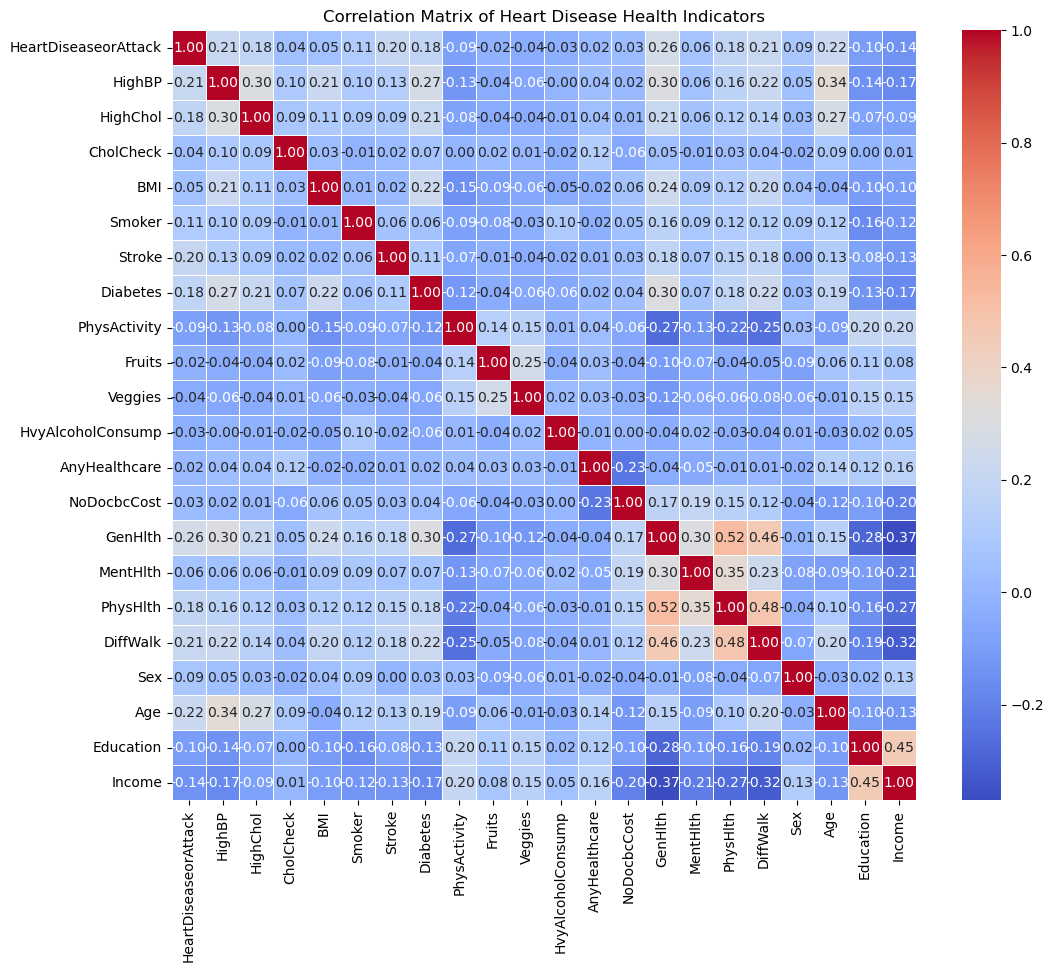

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Heart Disease Health Indicators")
plt.show()

In [4]:
# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                      HeartDiseaseorAttack    HighBP  HighChol  CholCheck  \
HeartDiseaseorAttack              1.000000  0.209361  0.180765   0.044206   
HighBP                            0.209361  1.000000  0.298199   0.098508   
HighChol                          0.180765  0.298199  1.000000   0.085642   
CholCheck                         0.044206  0.098508  0.085642   1.000000   
BMI                               0.052904  0.213748  0.106722   0.034495   
Smoker                            0.114441  0.096991  0.091299  -0.009929   
Stroke                            0.203002  0.129575  0.092620   0.024158   
Diabetes                          0.180272  0.271596  0.209085   0.067546   
PhysActivity                     -0.087299 -0.125267 -0.078046   0.004190   
Fruits                           -0.019790 -0.040555 -0.040859   0.023849   
Veggies                          -0.039167 -0.061266 -0.039874   0.006121   
HvyAlcoholConsump                -0.028991 -0.003972 -0.

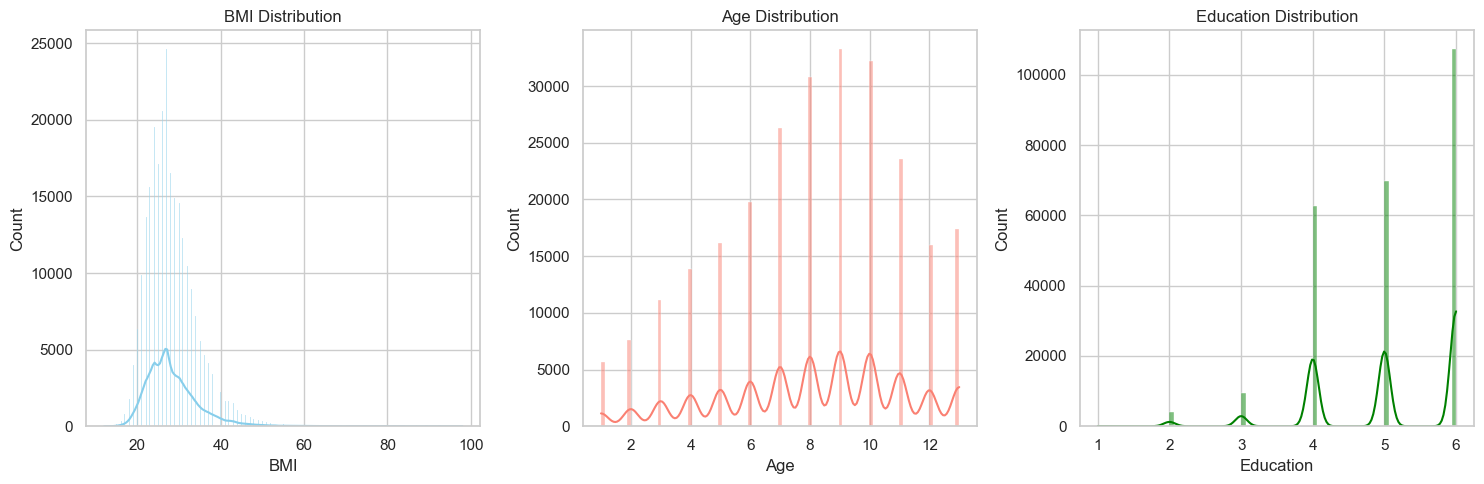

In [5]:


# Set the style of seaborn
sns.set(style="whitegrid")

# Plot histograms or KDEs for BMI, Age, and Education
plt.figure(figsize=(15, 5))

# Histogram/KDE for BMI
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='BMI', kde=True, color='skyblue')
plt.title('BMI Distribution')

# Histogram/KDE for Age
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='Age', kde=True, color='salmon')
plt.title('Age Distribution')

# Histogram/KDE for Education
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='Education', kde=True, color='green')
plt.title('Education Distribution')

plt.tight_layout()
plt.show()


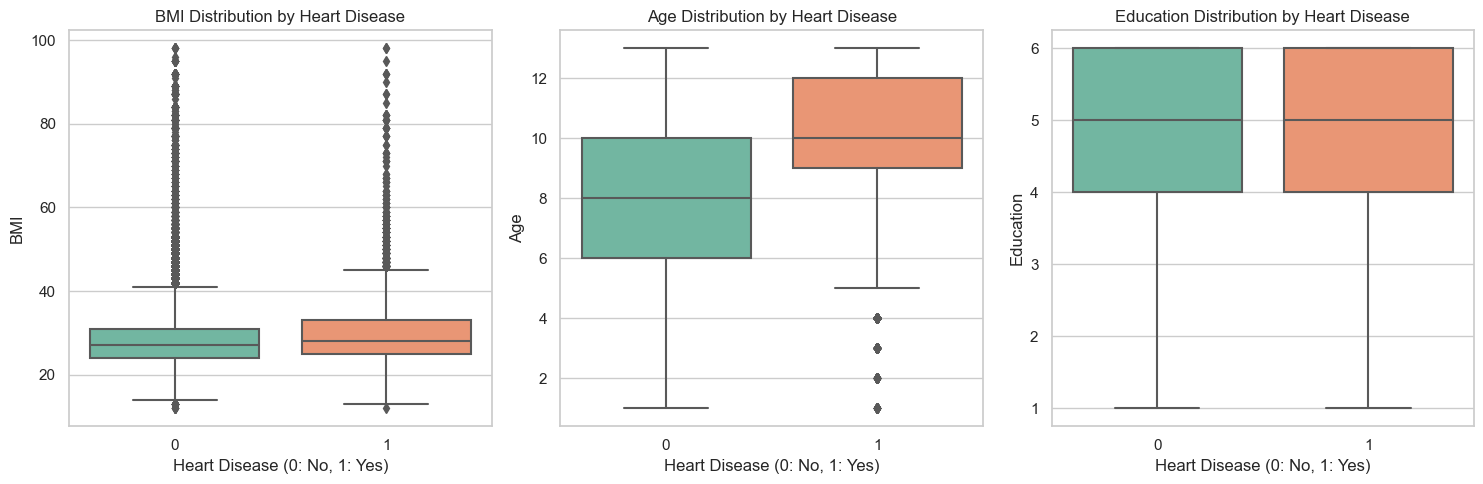

In [6]:
# Plot box plots for BMI, Age, and Education comparing individuals with and without heart disease
plt.figure(figsize=(15, 5))

# Box plot for BMI
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='HeartDiseaseorAttack', y='BMI', palette='Set2')
plt.title('BMI Distribution by Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('BMI')

# Box plot for Age
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='HeartDiseaseorAttack', y='Age', palette='Set2')
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Age')

# Box plot for Education
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='HeartDiseaseorAttack', y='Education', palette='Set2')
plt.title('Education Distribution by Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Education')

plt.tight_layout()
plt.show()


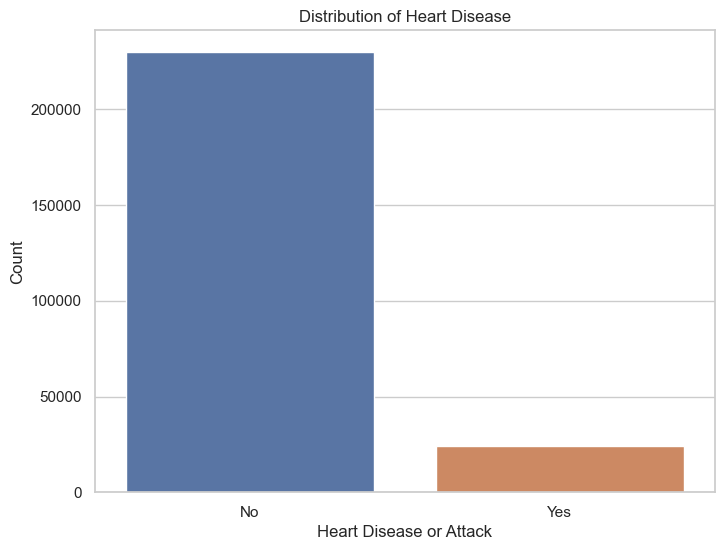

In [7]:
# Plot the distribution of the target variable (HeartDiseaseorAttack)
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDiseaseorAttack', data=df)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease or Attack')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [8]:
# Calculate class distribution
class_distribution = df['HeartDiseaseorAttack'].value_counts(normalize=True) * 100

# Print class distribution
print("Class Distribution:")
print(class_distribution)

# Check for class imbalance
if len(class_distribution) > 1:
    imbalance_ratio = class_distribution[1] / class_distribution[0]
    print("\nImbalance Ratio: {:.2f}".format(imbalance_ratio))
else:
    print("\nOnly one class present.")


Class Distribution:
0    90.581441
1     9.418559
Name: HeartDiseaseorAttack, dtype: float64

Imbalance Ratio: 0.10


In [10]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define features (X) and target variable (y)
X = df.drop('HeartDiseaseorAttack', axis=1)  # Features are all columns except 'HeartDiseaseorAttack'
y = df['HeartDiseaseorAttack']  # Target variable is 'HeartDiseaseorAttack'

# Perform oversampling using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Perform undersampling using RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_resampled, y_resampled)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to hold feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importance:")
print(feature_importance_df)

# Select top features based on importance
num_features_to_select = 5  # Change this number as needed
selected_features = feature_importance_df.head(num_features_to_select)['Feature'].tolist()

# Select only the top features from the dataset
X_selected = X_resampled[selected_features]

# Print selected features
print("\nSelected Features:")
print(selected_features)


Feature Importance:
              Feature  Importance
3                 BMI    0.176453
18                Age    0.165698
20             Income    0.098274
15           PhysHlth    0.083018
13            GenHlth    0.076405
19          Education    0.060203
14           MentHlth    0.054452
0              HighBP    0.037074
7        PhysActivity    0.031234
6            Diabetes    0.031042
4              Smoker    0.027363
1            HighChol    0.026379
17                Sex    0.025798
8              Fruits    0.021730
9             Veggies    0.019531
16           DiffWalk    0.016988
10  HvyAlcoholConsump    0.012722
12        NoDocbcCost    0.012212
5              Stroke    0.009299
11      AnyHealthcare    0.008424
2           CholCheck    0.005699

Selected Features:
['BMI', 'Age', 'Income', 'PhysHlth', 'GenHlth']


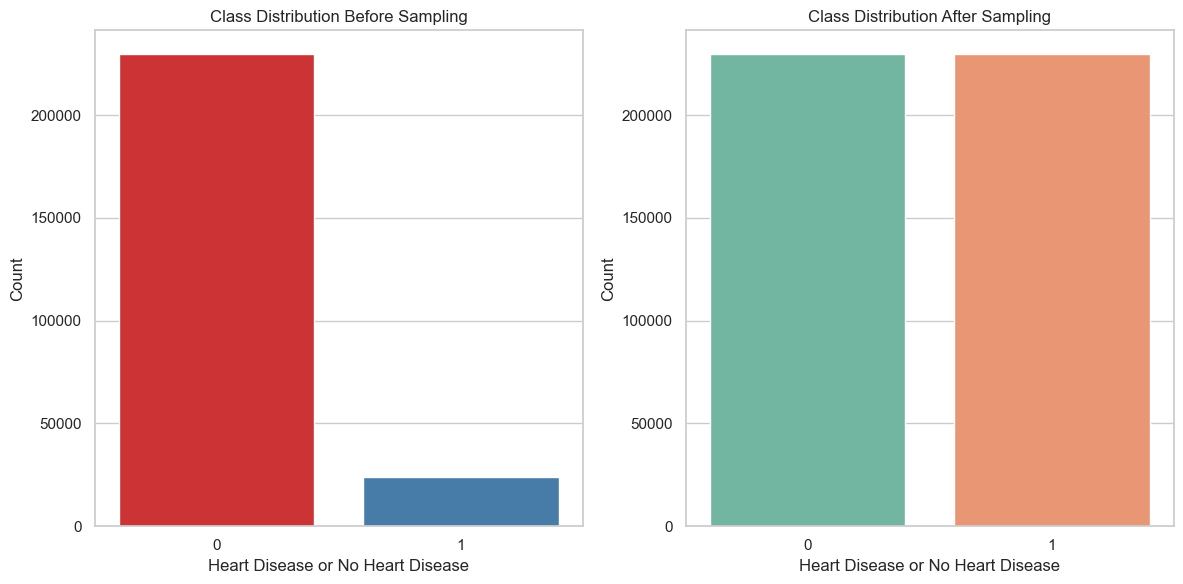

Model saved as: random_forest_model_selected_features.pkl
Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79     45888
           1       0.77      0.86      0.81     46027

    accuracy                           0.80     91915
   macro avg       0.81      0.80      0.80     91915
weighted avg       0.81      0.80      0.80     91915

Confusion Matrix:
[[34434 11454]
 [ 6620 39407]]


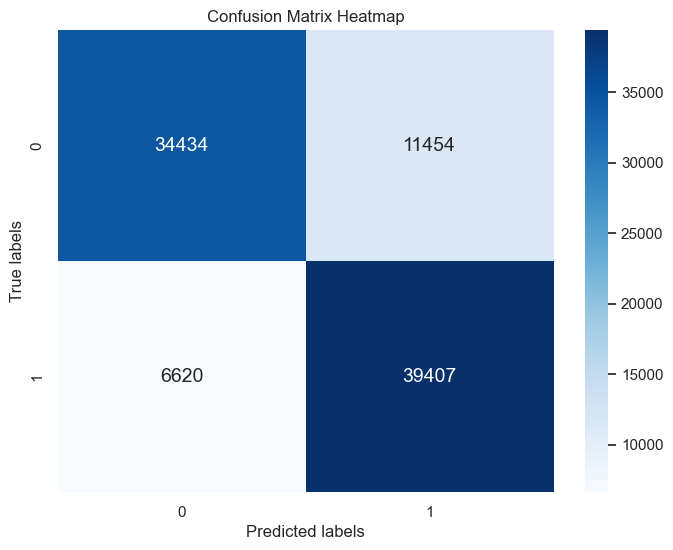

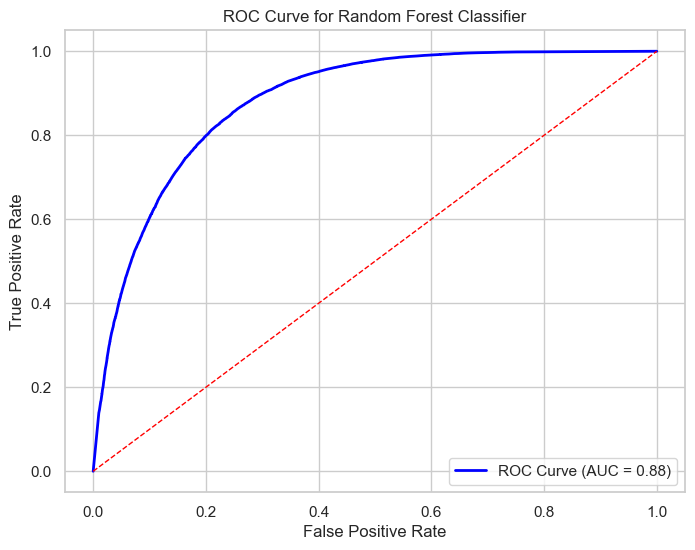

In [12]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define features (X) and target variable (y)
X = df[['BMI', 'Age', 'Income', 'PhysHlth', 'GenHlth']]
y = df['HeartDiseaseorAttack']  

# Perform oversampling using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Perform undersampling using RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_resampled, y_resampled)

# Plot class distribution after oversampling and undersampling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=y, palette='Set1')
plt.title('Class Distribution Before Sampling')
plt.xlabel('Heart Disease or No Heart Disease')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled, palette='Set2')
plt.title('Class Distribution After Sampling')
plt.xlabel('Heart Disease or No Heart Disease')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Save the model
model_filename = 'random_forest_model_selected_features.pkl'
joblib.dump(rf_classifier, model_filename)
print("Model saved as:", model_filename)

# Predict on the testing data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate model performance
print("Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred_rf))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={'size': 14})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Calculate ROC curve
y_pred_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_prob_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


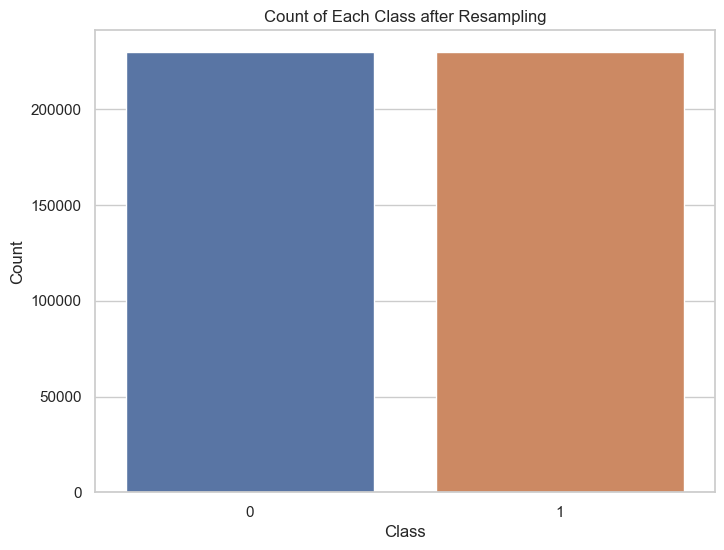

Model saved as: random_forest_model.pkl
Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45888
           1       1.00      1.00      1.00     46027

    accuracy                           1.00     91915
   macro avg       1.00      1.00      1.00     91915
weighted avg       1.00      1.00      1.00     91915

Confusion Matrix:
[[45888     0]
 [    0 46027]]


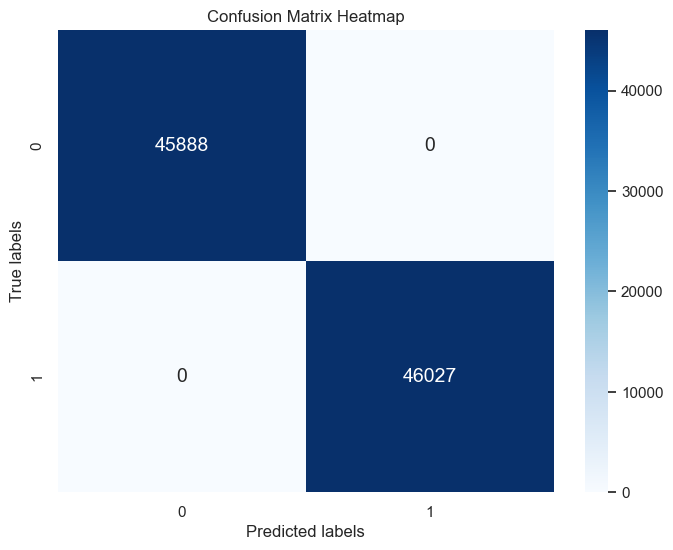

In [13]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib

# Define features (X) and target variable (y)
X = df.drop('HeartDiseaseorAttack', axis=1)  # Features are all columns except 'HeartDiseaseorAttack'
y = df['HeartDiseaseorAttack']  # Target variable is 'HeartDiseaseorAttack'

# Perform oversampling using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Perform undersampling using RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_resampled, y_resampled)

# Create a DataFrame to hold the resampled data
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['HeartDiseaseorAttack'] = y_resampled

# Plot the count of each class after resampling
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDiseaseorAttack', data=resampled_df)
plt.title('Count of Each Class after Resampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Save the model
model_filename = 'random_forest_model.pkl'
joblib.dump(rf_classifier, model_filename)
print("Model saved as:", model_filename)

# Predict on the testing data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate model performance
print("Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred_rf))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={'size': 14})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


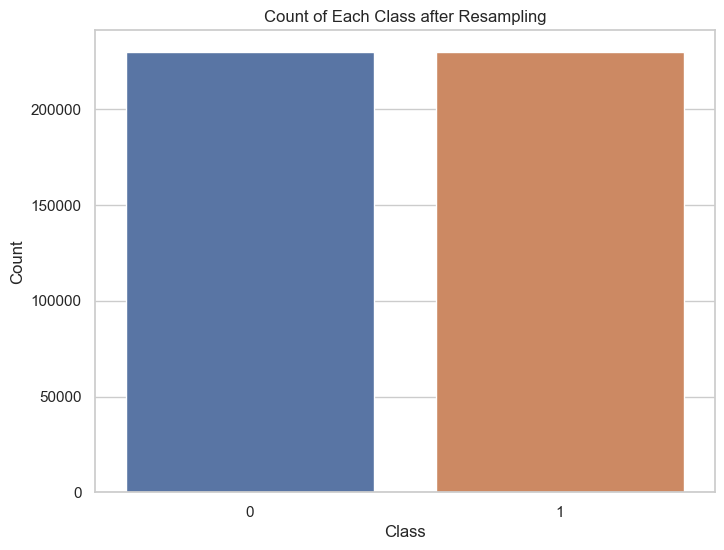

Model saved as: random_forest_model.pkl


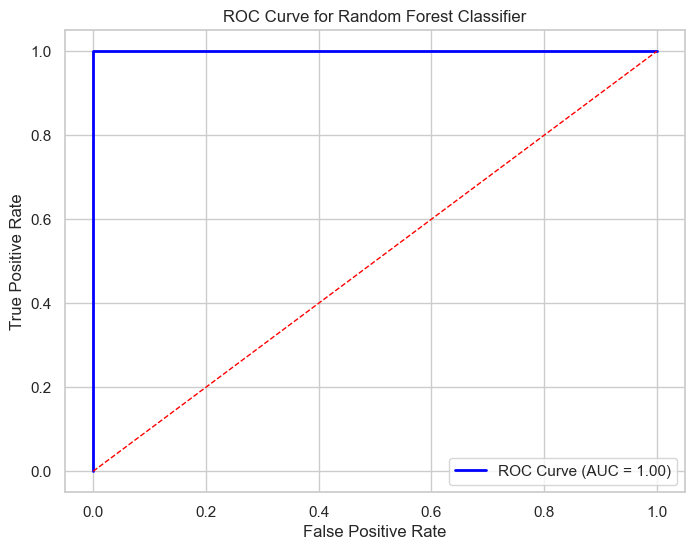

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45888
           1       1.00      1.00      1.00     46027

    accuracy                           1.00     91915
   macro avg       1.00      1.00      1.00     91915
weighted avg       1.00      1.00      1.00     91915

Confusion Matrix:
[[45888     0]
 [    0 46027]]


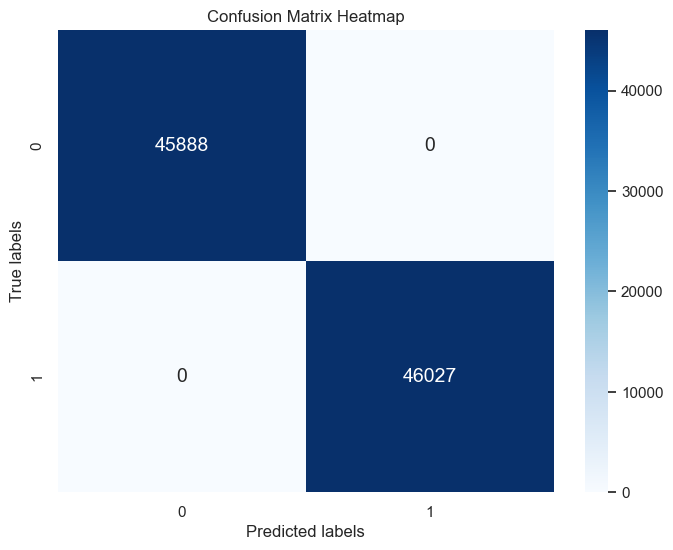

In [14]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib

# Define features (X) and target variable (y)
X = df.drop('HeartDiseaseorAttack', axis=1)  # Features are all columns except 'HeartDiseaseorAttack'
y = df['HeartDiseaseorAttack']  # Target variable is 'HeartDiseaseorAttack'

# Perform oversampling using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Perform undersampling using RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_resampled, y_resampled)

# Create a DataFrame to hold the resampled data
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['HeartDiseaseorAttack'] = y_resampled

# Plot the count of each class after resampling
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDiseaseorAttack', data=resampled_df)
plt.title('Count of Each Class after Resampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Save the model
model_filename = 'random_forest_model.pkl'
joblib.dump(rf_classifier, model_filename)
print("Model saved as:", model_filename)

# Predict probabilities on the testing data
y_pred_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_prob_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Predict on the testing data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate model performance
print("Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred_rf))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={'size': 14})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap')
plt.show()
